In [ ]:
!pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 8.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelBinarizer, StandardScaler

#from feature_engine.selection import MRMR
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


## Load Data Train

pake data yang udah difilter features nya berdasarkan DEG

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Tugas Akhir/DEG_revisi_train/train_DEG_data_revisi.tsv", sep = "\t")
df.head()

,Unnamed: 0,GSM7461809,MP2PRT_ALL_482,GSE277354_67,MP2PRT_ALL_1066,MP2PRT_ALL_613,GSM3028297,GSE277354_65,MP2PRT_ALL_1005,TCGA_LAML_61,...,GSM4280632,MP2PRT_ALL_70,GSM7221895,GSM4280636,GSM7968096,MP2PRT_ALL_232,GSM8013463,MP2PRT_ALL_989,MP2PRT_ALL_339,MP2PRT_ALL_779
0,GNAO1-DT,-27.645051,-66.175957,66.020062,-66.175957,-66.175957,-41.516867,66.020062,-66.175957,93.123603,...,88.713216,-66.175957,65.720168,88.430187,50.726246,-66.175957,224.693146,-66.175957,-66.175957,-66.175957
1,LY6G6E,34.317386,272.063154,-58.012831,115.925247,115.925247,-79.684082,-60.108516,115.925247,-249.742190,...,-150.257755,206.169617,-182.762389,-151.689546,-159.978083,115.925247,-267.541690,184.989213,115.925247,217.305345
2,AC099332.2,-71.788375,117.215324,-95.654754,66.326093,75.886206,-71.788127,-95.654754,33.545784,-79.944698,...,-152.274411,152.777274,-102.114086,-152.274411,-93.029120,67.086740,-122.945124,85.070198,57.984477,51.453954
3,AC008759.2,-88.828399,88.350180,-112.768255,105.326585,323.636357,-88.827930,-112.768255,306.842121,-167.204464,...,-169.120187,48.217425,-118.796390,-169.120187,-110.117630,95.259486,-139.716973,48.217425,80.612156,48.217425
4,AC109466.1,-81.733396,60.041676,-105.362715,42.859985,120.681207,-81.732795,-105.362715,49.548074,-56.991109,...,-142.293650,44.332290,-76.148370,-142.293650,-38.819024,62.469876,-69.761579,101.989747,46.863791,54.101427


In [ ]:
trans_df = df.transpose()
trans_df.head()

,0,1,2,3,4,5,6,7,8,9,...,16166,16167,16168,16169,16170,16171,16172,16173,16174,16175
Unnamed: 0,GNAO1-DT,LY6G6E,AC099332.2,AC008759.2,AC109466.1,AC011815.1,LOC105369904,LOC105376278,CLEC2L,AC010768.1,...,AC138951.1,RN7SL302P,AC096642.1,RPL21P121,PF4,AL109947.1,RTL8A,STX8P1,AC008770.3,AC010422.2
GSM7461809,-27.645051,34.317386,-71.788375,-88.828399,-81.733396,-134.181412,-118.723798,-190.634077,-148.947039,-62.718619,...,-65.586141,-82.325589,-46.670692,-118.323443,97.698724,-65.092511,-91.490413,-124.380005,-197.278415,-108.469236
MP2PRT_ALL_482,-66.175957,272.063154,117.215324,88.35018,60.041676,70.192846,3.155496,121.707161,74.672952,136.012691,...,42.473327,3.877125,82.980763,39.295331,36.842216,56.613709,-117.380359,185.432507,77.840012,113.789285
GSE277354_67,66.020062,-58.012831,-95.654754,-112.768255,-105.362715,-216.358362,49.447525,41.653076,-106.680818,-20.288755,...,-146.583647,-106.578012,-131.833114,-74.39162,-63.335882,-88.895314,-42.702623,-82.184292,-155.160782,-63.868545
MP2PRT_ALL_1066,-66.175957,115.925247,66.326093,105.326585,42.859985,186.834546,3.155496,121.707161,19.4538,113.980941,...,121.722382,43.248787,67.507433,51.38615,1.607709,23.563362,152.92646,76.32106,130.394906,91.988684


In [ ]:
trans_df.columns = trans_df.iloc[0]
trans_df = trans_df[1:]
trans_df.head()

Unnamed: 0,GNAO1-DT,LY6G6E,AC099332.2,AC008759.2,AC109466.1,AC011815.1,LOC105369904,LOC105376278,CLEC2L,AC010768.1,...,AC138951.1,RN7SL302P,AC096642.1,RPL21P121,PF4,AL109947.1,RTL8A,STX8P1,AC008770.3,AC010422.2
GSM7461809,-27.645051,34.317386,-71.788375,-88.828399,-81.733396,-134.181412,-118.723798,-190.634077,-148.947039,-62.718619,...,-65.586141,-82.325589,-46.670692,-118.323443,97.698724,-65.092511,-91.490413,-124.380005,-197.278415,-108.469236
MP2PRT_ALL_482,-66.175957,272.063154,117.215324,88.35018,60.041676,70.192846,3.155496,121.707161,74.672952,136.012691,...,42.473327,3.877125,82.980763,39.295331,36.842216,56.613709,-117.380359,185.432507,77.840012,113.789285
GSE277354_67,66.020062,-58.012831,-95.654754,-112.768255,-105.362715,-216.358362,49.447525,41.653076,-106.680818,-20.288755,...,-146.583647,-106.578012,-131.833114,-74.39162,-63.335882,-88.895314,-42.702623,-82.184292,-155.160782,-63.868545
MP2PRT_ALL_1066,-66.175957,115.925247,66.326093,105.326585,42.859985,186.834546,3.155496,121.707161,19.4538,113.980941,...,121.722382,43.248787,67.507433,51.38615,1.607709,23.563362,152.92646,76.32106,130.394906,91.988684
MP2PRT_ALL_613,-66.175957,115.925247,75.886206,323.636357,120.681207,164.802937,3.155496,121.707161,19.4538,204.351208,...,153.000851,-20.531418,188.835338,-61.664638,58.715661,134.254116,329.858486,33.794585,44.209339,-12.012575


In [ ]:
trans_df.index

Index(['GSM7461809', 'MP2PRT_ALL_482', 'GSE277354_67', 'MP2PRT_ALL_1066',
       'MP2PRT_ALL_613', 'GSM3028297', 'GSE277354_65', 'MP2PRT_ALL_1005',
       'TCGA_LAML_61', 'MP2PRT_ALL_1131',
       ...
       'GSM4280632', 'MP2PRT_ALL_70', 'GSM7221895', 'GSM4280636', 'GSM7968096',
       'MP2PRT_ALL_232', 'GSM8013463', 'MP2PRT_ALL_989', 'MP2PRT_ALL_339',
       'MP2PRT_ALL_779'],
      dtype='object', length=1852)

In [ ]:
trans_df.columns

Index(['GNAO1-DT', 'LY6G6E', 'AC099332.2', 'AC008759.2', 'AC109466.1',
       'AC011815.1', 'LOC105369904', 'LOC105376278', 'CLEC2L', 'AC010768.1',
       ...
       'AC138951.1', 'RN7SL302P', 'AC096642.1', 'RPL21P121', 'PF4',
       'AL109947.1', 'RTL8A', 'STX8P1', 'AC008770.3', 'AC010422.2'],
      dtype='object', name='Unnamed: 0', length=16176)

In [ ]:
df_info = pd.read_csv("/content/drive/MyDrive/Tugas Akhir/preprocessing_data/training_info.tsv", sep = "\t")
df_info.head()

,patient_ID,class,batch
0,GSM7461809,non-leukemia,29
1,MP2PRT_ALL_482,ALL,38
2,GSE277354_67,CML,33
3,MP2PRT_ALL_1066,ALL,38
4,MP2PRT_ALL_613,ALL,38


In [ ]:
df_label = df_info.drop('batch', axis = 'columns')
df_label.head()

,patient_ID,class
0,GSM7461809,non-leukemia
1,MP2PRT_ALL_482,ALL
2,GSE277354_67,CML
3,MP2PRT_ALL_1066,ALL
4,MP2PRT_ALL_613,ALL


In [ ]:
df_label.set_index('patient_ID', inplace = True)
df_label.head()

,class
patient_ID,
GSM7461809,non-leukemia
MP2PRT_ALL_482,ALL
GSE277354_67,CML
MP2PRT_ALL_1066,ALL
MP2PRT_ALL_613,ALL


In [ ]:
all(col in trans_df.index for col in df_label.index)

True

In [ ]:
all(trans_df.index == df_label.index)

True

## Preprocessing

### Assign Values

In [ ]:
len(trans_df.columns)

16176

In [ ]:
x = trans_df.iloc[:, 0:16176]
x.head()

Unnamed: 0,GNAO1-DT,LY6G6E,AC099332.2,AC008759.2,AC109466.1,AC011815.1,LOC105369904,LOC105376278,CLEC2L,AC010768.1,...,AC138951.1,RN7SL302P,AC096642.1,RPL21P121,PF4,AL109947.1,RTL8A,STX8P1,AC008770.3,AC010422.2
GSM7461809,-27.645051,34.317386,-71.788375,-88.828399,-81.733396,-134.181412,-118.723798,-190.634077,-148.947039,-62.718619,...,-65.586141,-82.325589,-46.670692,-118.323443,97.698724,-65.092511,-91.490413,-124.380005,-197.278415,-108.469236
MP2PRT_ALL_482,-66.175957,272.063154,117.215324,88.35018,60.041676,70.192846,3.155496,121.707161,74.672952,136.012691,...,42.473327,3.877125,82.980763,39.295331,36.842216,56.613709,-117.380359,185.432507,77.840012,113.789285
GSE277354_67,66.020062,-58.012831,-95.654754,-112.768255,-105.362715,-216.358362,49.447525,41.653076,-106.680818,-20.288755,...,-146.583647,-106.578012,-131.833114,-74.39162,-63.335882,-88.895314,-42.702623,-82.184292,-155.160782,-63.868545
MP2PRT_ALL_1066,-66.175957,115.925247,66.326093,105.326585,42.859985,186.834546,3.155496,121.707161,19.4538,113.980941,...,121.722382,43.248787,67.507433,51.38615,1.607709,23.563362,152.92646,76.32106,130.394906,91.988684
MP2PRT_ALL_613,-66.175957,115.925247,75.886206,323.636357,120.681207,164.802937,3.155496,121.707161,19.4538,204.351208,...,153.000851,-20.531418,188.835338,-61.664638,58.715661,134.254116,329.858486,33.794585,44.209339,-12.012575


In [ ]:
y = df_label['class']
y = y.to_numpy()
print(y)

['non-leukemia' 'ALL' 'CML' ... 'ALL' 'ALL' 'ALL']


In [ ]:
print('Class label: ', np.unique(y))

Class label:  ['ALL' 'AML' 'CLL' 'CML' 'non-leukemia']


In [ ]:
print('ALL:', np.count_nonzero(y == 'ALL'))
print('AML:', np.count_nonzero(y == 'AML'))
print('CLL:', np.count_nonzero(y == 'CLL'))
print('CML:', np.count_nonzero(y == 'CML'))
print('non-leukemia:', np.count_nonzero(y == 'non-leukemia'))

ALL: 916
AML: 322
CLL: 246
CML: 155
non-leukemia: 213


### Encoding labels

In [ ]:
label_binarize = LabelBinarizer()

In [ ]:
label_binarize.fit(y)

LabelBinarizer()

In [ ]:
encoded_y = label_binarize.transform(y)
print(encoded_y)

[[0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 1 0]
 ...
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]


In [ ]:
len(encoded_y)

1852

In [ ]:
print("Class order: ", label_binarize.classes_)

Class order:  ['ALL' 'AML' 'CLL' 'CML' 'non-leukemia']


In [ ]:
label_1d = np.argmax(encoded_y, axis = 1)
label_1d

array([4, 0, 3, ..., 0, 0, 0])

### Oversampling

In [ ]:
oversample = SMOTE(sampling_strategy = 'auto', k_neighbors = 5, random_state = 42)

In [ ]:
x_over, y_over = oversample.fit_resample(x, encoded_y)

In [ ]:
x_over

Unnamed: 0,GNAO1-DT,LY6G6E,AC099332.2,AC008759.2,AC109466.1,AC011815.1,LOC105369904,LOC105376278,CLEC2L,AC010768.1,...,AC138951.1,RN7SL302P,AC096642.1,RPL21P121,PF4,AL109947.1,RTL8A,STX8P1,AC008770.3,AC010422.2
0,-27.645051,34.317386,-71.788375,-88.828399,-81.733396,-134.181412,-118.723798,-190.634077,-148.947039,-62.718619,...,-65.586141,-82.325589,-46.670692,-118.323443,97.698724,-65.092511,-91.490413,-124.380005,-197.278415,-108.469236
1,-66.175957,272.063154,117.215324,88.35018,60.041676,70.192846,3.155496,121.707161,74.672952,136.012691,...,42.473327,3.877125,82.980763,39.295331,36.842216,56.613709,-117.380359,185.432507,77.840012,113.789285
2,66.020062,-58.012831,-95.654754,-112.768255,-105.362715,-216.358362,49.447525,41.653076,-106.680818,-20.288755,...,-146.583647,-106.578012,-131.833114,-74.39162,-63.335882,-88.895314,-42.702623,-82.184292,-155.160782,-63.868545
3,-66.175957,115.925247,66.326093,105.326585,42.859985,186.834546,3.155496,121.707161,19.4538,113.980941,...,121.722382,43.248787,67.507433,51.38615,1.607709,23.563362,152.92646,76.32106,130.394906,91.988684
4,-66.175957,115.925247,75.886206,323.636357,120.681207,164.802937,3.155496,121.707161,19.4538,204.351208,...,153.000851,-20.531418,188.835338,-61.664638,58.715661,134.254116,329.858486,33.794585,44.209339,-12.012575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4575,40.870088,-103.082677,-95.08076,-111.85206,-47.579069,-91.515685,-20.264101,-48.208324,-129.820392,-20.611116,...,-27.856446,-46.646109,-11.488775,-75.417326,-153.309733,-32.368659,-42.377533,-84.502708,-143.45509,-70.815647
4576,-20.066393,-59.433524,-45.003224,-116.62087,-105.016203,-111.122201,-66.796222,-58.216234,-141.163289,-76.510852,...,-91.639951,-64.454157,-49.302291,-100.539887,-145.707798,-52.520461,-195.601166,-108.102158,-208.373179,-121.559033
4577,88.627359,-150.306789,-152.274411,-169.120187,-142.29365,-225.055607,24.928748,64.362919,-66.723485,32.824027,...,-141.935712,-147.484276,-118.849897,-26.122604,-25.956222,-123.36674,63.524465,-43.48803,-119.227668,-35.945932
4578,15.588642,-67.930202,-71.785669,-88.823308,-81.72689,-134.169506,-97.280597,-124.794141,-206.651379,-62.717379,...,-65.582548,-82.319454,-46.669376,-118.314171,-71.126784,-65.088047,-131.964422,-124.368912,-197.257018,-108.459577


In [ ]:
print(y_over)
print(len(y_over))

[[0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 1 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]
4580


In [ ]:
y_over_1d = np.argmax(y_over, axis = 1)
print(y_over_1d)
print(len(y_over_1d))

[4 0 3 ... 4 4 4]
4580


/tmp/ipython-input-29-1078456371.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = y_over_1d, palette = 'pastel')


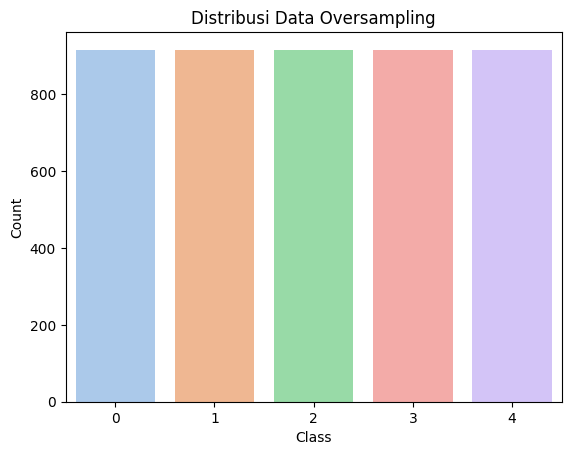

In [ ]:
sns.countplot(x = y_over_1d, palette = 'pastel')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribusi Data Oversampling')
plt.show()

### Scale Data

In [ ]:
scaler = StandardScaler()

In [ ]:
x_sc = pd.DataFrame(
    scaler.fit_transform(x),
    columns = x.columns,
    index = x.index
)

In [ ]:
x_sc.head()

Unnamed: 0,GNAO1-DT,LY6G6E,AC099332.2,AC008759.2,AC109466.1,AC011815.1,LOC105369904,LOC105376278,CLEC2L,AC010768.1,...,AC138951.1,RN7SL302P,AC096642.1,RPL21P121,PF4,AL109947.1,RTL8A,STX8P1,AC008770.3,AC010422.2
GSM7461809,-0.352295,0.050527,-0.632196,-0.713637,-1.068570,-0.927327,-2.989176,-1.563397,-1.246786,-0.773166,...,-0.861375,-1.349198,-0.635203,-1.373949,0.499761,-1.390012,-0.394582,-1.388697,-1.695024,-1.396424
MP2PRT_ALL_482,-0.884482,1.448941,1.315204,0.769209,0.644677,0.390573,0.022282,0.845451,0.636337,1.674508,...,0.220965,0.161036,0.754556,0.528837,0.070048,1.090798,-0.479897,2.049271,0.536115,1.180557
GSE277354_67,0.941404,-0.492557,-0.878103,-0.913995,-1.354113,-1.457242,1.166089,0.228056,-0.890859,-0.250579,...,-1.672658,-1.774090,-1.548075,-0.843600,-0.637319,-1.875199,-0.233811,-0.920454,-1.353461,-0.879300
MP2PRT_ALL_1066,-0.884482,0.530542,0.790867,0.911288,0.437049,1.142733,0.022282,0.845451,0.171332,1.403154,...,1.014736,0.850811,0.588694,0.674799,-0.178746,0.417113,0.410846,0.838469,0.962322,0.927789
MP2PRT_ALL_613,-0.884482,0.530542,0.889370,2.738370,1.377461,1.000663,0.022282,0.845451,0.171332,2.516199,...,1.328025,-0.266591,1.889231,-0.689959,0.224498,2.673389,0.993890,0.366556,0.263379,-0.278055


## Features Selection

### MRMR

In [ ]:
gene_name = list(x.columns.values)
print(gene_name)

['GNAO1-DT', 'LY6G6E', 'AC099332.2', 'AC008759.2', 'AC109466.1', 'AC011815.1', 'LOC105369904', 'LOC105376278', 'CLEC2L', 'AC010768.1', 'LOC107984377', 'AC006557.1', 'AC241585.2', 'PKP2', 'ARHGEF17-AS1', 'TSTD1', 'AL157384.1', 'AC112721.2', 'PCDHB14', 'SNORD38C', 'AC004490.1', 'UHRF1', 'AC104129.1', 'PTPN13', 'MIR4257', 'AC027601.4', 'Z99127.1', 'LOC101927949', 'AL033528.2', 'HBQ1', 'AL136985.3', 'RAB11FIP1P1', 'IFITM3P6', 'DDTL', 'LOC107986761', 'HSPB6', 'AC017071.1', 'ATP5PDP4', 'AC104024.1', 'CTXN2', 'AC023424.1', 'LOC105378305', 'DSCAM', 'LOC107986760', 'AL137060.3', 'CTBS', 'LOC105379505', 'GCOM2', 'AC123912.4', 'VEGFB', 'AC100803.4', 'ABCF1-DT', 'AL442125.2', 'ABHD17AP3', 'AC091138.1', 'AC092042.1', 'AC139491.5', 'AC073343.2', 'AL121950.1', 'RPS15AP36', 'ANKRD34B', 'AC006483.2', 'LOC107987250', 'IGFLR1', 'AC007637.1', 'AC006128.1', 'AC132008.2', 'AC115099.1', 'GAPDHP69', 'WDR60', 'AC114878.1', 'AP002026.1', 'AC005253.1', 'RNU1-91P', 'KDELC2', 'TRAV1-2', 'AC008026.1', 'AL031714.1',

In [ ]:
len(gene_name)

16176

In [ ]:
discrete = []
n = len(x.columns)
for i in range(0,n):
  discrete.append(False)

In [ ]:
print(discrete)

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

In [ ]:
len(discrete)

16176

In [ ]:
sel = MRMR(
    variables = gene_name,
    method = "MID",
    max_features = 50,
    discrete_features = discrete,
    regression = False,
    random_state = 42,
)

In [ ]:
sel.fit(x_sc, label_1d)

MRMR(discrete_features=[False, False, False, False, False, False, False, False,
                        False, False, False, False, False, False, False, False,
                        False, False, False, False, False, False, False, False,
                        False, False, False, False, False, False, ...],
     max_features=50, method='MID', random_state=42,
     variables=['GNAO1-DT', 'LY6G6E', 'AC099332.2', 'AC008759.2', 'AC109466.1',
                'AC011815.1', 'LOC105369904', 'LOC105376278', 'CLEC2L',
                'AC010768.1', 'LOC107984377', 'AC006557.1', 'AC241585.2',
                'PKP2', 'ARHGEF17-AS1', 'TSTD1', 'AL157384.1', 'AC112721.2',
                'PCDHB14', 'SNORD38C', 'AC004490.1', 'UHRF1', 'AC104129.1',
                'PTPN13', 'MIR4257', 'AC027601.4', 'Z99127.1', 'LOC101927949',
                'AL033528.2', 'HBQ1', ...])

In [ ]:
import joblib

#joblib.dump(sel, '/content/drive/MyDrive/Tugas Akhir/Features_selection_revisi/MRMR_50_MID/mrmr_50mid.joblib')

['/content/drive/MyDrive/Tugas Akhir/Features_selection_revisi/MRMR_50_MID/mrmr_50mid.joblib']

### MRMR ke Dataset

#### Transform Data

In [ ]:
import joblib

sel = joblib.load('/content/drive/MyDrive/Tugas Akhir/Features_selection_revisi/MRMR_50_MID/mrmr_50mid.joblib')

In [ ]:
sel

MRMR(discrete_features=[False, False, False, False, False, False, False, False,
                        False, False, False, False, False, False, False, False,
                        False, False, False, False, False, False, False, False,
                        False, False, False, False, False, False, ...],
     max_features=50, method='MID', random_state=42,
     variables=['GNAO1-DT', 'LY6G6E', 'AC099332.2', 'AC008759.2', 'AC109466.1',
                'AC011815.1', 'LOC105369904', 'LOC105376278', 'CLEC2L',
                'AC010768.1', 'LOC107984377', 'AC006557.1', 'AC241585.2',
                'PKP2', 'ARHGEF17-AS1', 'TSTD1', 'AL157384.1', 'AC112721.2',
                'PCDHB14', 'SNORD38C', 'AC004490.1', 'UHRF1', 'AC104129.1',
                'PTPN13', 'MIR4257', 'AC027601.4', 'Z99127.1', 'LOC101927949',
                'AL033528.2', 'HBQ1', ...])

In [ ]:
x_tr = sel.transform(x_sc)

In [ ]:
x_tr.head()

Unnamed: 0,SERPINB9-AS1,LOC154761,LOC105374407,RASSF6,LAG3,SLC25A27,TRERNA1,S100A16,TREML4,LCDR,...,SLCO5A1,FLJ45513,PGLYRP1,LOC112268195,LINC01122,ANO1,ASB9P1,TTTY10,CYP21A2,SNORD3B-2
GSM7461809,-3.022604,-1.207050,-0.281067,-0.616355,-0.341021,-1.916811,-0.582326,0.226387,-0.950677,-1.323904,...,-0.473789,-1.544916,-0.691874,-2.188700,0.202312,-1.301971,-0.640684,-0.433252,-0.547846,-1.772117
MP2PRT_ALL_482,0.519295,0.721728,0.580380,0.563731,0.617109,0.212728,1.377435,0.931569,0.560995,0.743516,...,-0.210239,0.743323,0.212461,0.656494,0.137370,0.129879,1.228998,0.582050,1.417829,1.262444
GSE277354_67,-0.239250,-2.027821,0.022646,-1.301923,0.124655,0.063333,0.199981,1.071873,-1.986597,-1.767019,...,1.404658,-1.066017,-0.748465,-0.834365,-0.596240,1.580346,-0.343782,-0.848806,0.160839,-1.270231
MP2PRT_ALL_1066,0.519295,0.721728,0.580380,0.559562,0.530863,0.559152,0.430504,-0.322290,0.869770,0.743516,...,-0.611129,0.743323,0.637728,0.656494,0.468681,0.258138,0.162069,0.993505,0.675873,0.862962
MP2PRT_ALL_613,0.519295,0.721728,0.580380,1.716090,1.073485,2.225857,-0.035407,0.642846,1.242909,0.743516,...,-0.283370,0.743323,0.212461,0.656494,2.517709,0.456486,4.119278,0.704513,0.087982,1.021243


In [ ]:
len(x_tr.columns)

50

In [ ]:
selected_features = list(x_tr.columns)
print(selected_features)

['SERPINB9-AS1', 'LOC154761', 'LOC105374407', 'RASSF6', 'LAG3', 'SLC25A27', 'TRERNA1', 'S100A16', 'TREML4', 'LCDR', 'VWDE', 'MTRNR2L1', 'RNVU1-7', 'LOC112268200', 'GAS2L1', 'METTL7B', 'XKRX', 'KASH5', 'IGKV1-9', 'CBS', 'PLA2G4B', 'FKBP10', 'LOC91450', 'LOC112268412', 'LINC00282', 'C21orf2', 'HERC2P11', 'MYZAP', 'RPLP0P2', 'PCLAF', 'BEST3', 'CNTNAP2', 'PCDHGB8P', 'TAP2', 'LINC01978', 'SSSCA1', 'CGNL1', 'HLA-DPB2', 'PLA2G2D', 'CLEC4A', 'SLCO5A1', 'FLJ45513', 'PGLYRP1', 'LOC112268195', 'LINC01122', 'ANO1', 'ASB9P1', 'TTTY10', 'CYP21A2', 'SNORD3B-2']


In [ ]:
#with open('/content/drive/MyDrive/Tugas Akhir/Features_selection_revisi/MRMR_50_MID/features_50mid_mrmr_selected.txt', 'w') as f:
 # for gene in selected_features:
  #  f.write(f"{gene}\n")

In [ ]:
len(x_tr.index)

1852

#### Ekstrak Fitur

In [ ]:
with open('/content/drive/MyDrive/Tugas Akhir/Features_selection_revisi/MRMR_50_MID/features_50mid_mrmr_selected.txt', 'r') as file:
    selected_genes = [line.strip() for line in file]

print(selected_genes)

['SERPINB9-AS1', 'LOC154761', 'LOC105374407', 'RASSF6', 'LAG3', 'SLC25A27', 'TRERNA1', 'S100A16', 'TREML4', 'LCDR', 'VWDE', 'MTRNR2L1', 'RNVU1-7', 'LOC112268200', 'GAS2L1', 'METTL7B', 'XKRX', 'KASH5', 'IGKV1-9', 'CBS', 'PLA2G4B', 'FKBP10', 'LOC91450', 'LOC112268412', 'LINC00282', 'C21orf2', 'HERC2P11', 'MYZAP', 'RPLP0P2', 'PCLAF', 'BEST3', 'CNTNAP2', 'PCDHGB8P', 'TAP2', 'LINC01978', 'SSSCA1', 'CGNL1', 'HLA-DPB2', 'PLA2G2D', 'CLEC4A', 'SLCO5A1', 'FLJ45513', 'PGLYRP1', 'LOC112268195', 'LINC01122', 'ANO1', 'ASB9P1', 'TTTY10', 'CYP21A2', 'SNORD3B-2']


In [ ]:
'''features_idx = []
for i in selected_genes:
  idx = gene_name.index(i)
  features_idx.append(idx)'''

In [ ]:
relevance_score = pd.Series(sel.relevance_, index = sel.variables_)
relevance_score

,0
GNAO1-DT,1.213470
LY6G6E,1.068563
AC099332.2,1.283405
AC008759.2,1.307694
AC109466.1,1.297341
...,...
AL109947.1,1.149438
RTL8A,0.974958
STX8P1,1.288728
AC008770.3,1.303414


In [ ]:
selected_relevance = relevance_score[selected_genes].sort_values(ascending = False)
selected_relevance

,0
C21orf2,1.366356
SSSCA1,1.347017
LINC00282,1.331151
LOC112268200,1.256477
LCDR,1.240504
TREML4,1.239066
LOC112268195,1.212919
FLJ45513,1.194549
LOC91450,1.193496
TTTY10,1.193317


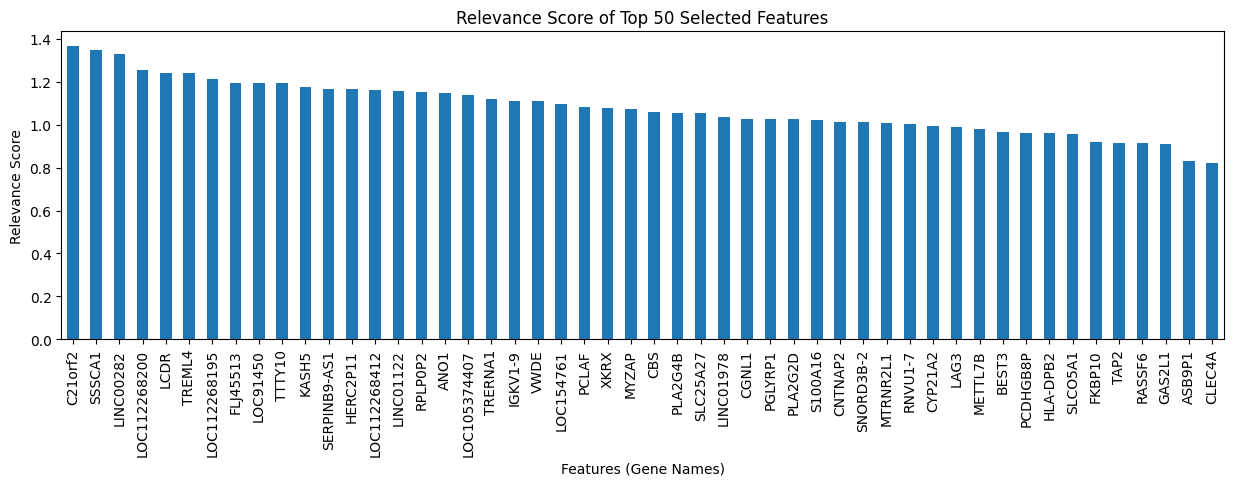

In [ ]:
selected_relevance.plot.bar(figsize = (15, 4))
plt.title("Relevance Score of Top 50 Selected Features")
plt.xlabel("Features (Gene Names)")
plt.ylabel("Relevance Score")
plt.show()

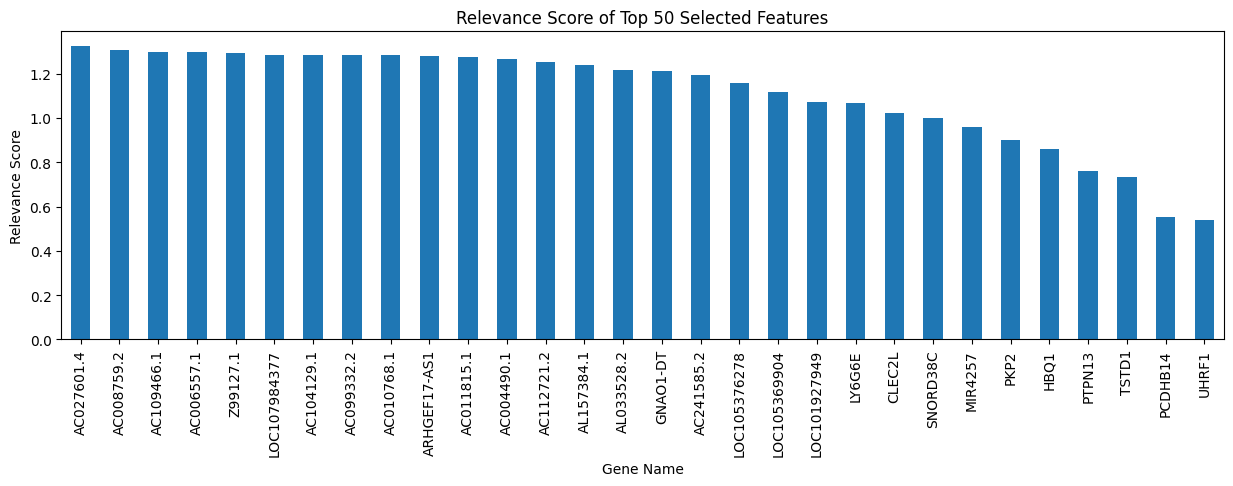

In [ ]:
top_features = sel.variables_[:30]

relevance_scores = pd.Series(sel.relevance_, index = sel.variables_)
selected_relevance = relevance_scores[top_features].sort_values(ascending = False)

selected_relevance.plot.bar(figsize = (15, 4))

plt.title("Relevance Score of Top 50 Selected Features")
plt.xlabel("Gene Name")
plt.ylabel("Relevance Score")
plt.show()

In [ ]:
#with open('/content/drive/MyDrive/Tugas Akhir/Features_selection_revisi/MRMR_30_MIQ/features_30miq_mrmr_selected.txt', 'w') as f:
 # for gene in top_features:
  #  f.write(f"{gene}\n")

### Lasso

#### Gridsearch untuk parameter

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ls', Lasso(random_state = 42))
])

In [ ]:
params = {'ls__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 100000]}

In [ ]:
grid = GridSearchCV(pipeline, params, refit = True, verbose = 3, cv = 10, return_train_score = True)

In [ ]:
grid.fit(x, label_1d)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.775e-01, tolerance: 3.315e-01
  model = cd_fast.enet_coordinate_descent(


[CV 1/10] END ls__alpha=1e-05;, score=(train=1.000, test=0.942) total time=  20.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.649e-01, tolerance: 3.265e-01
  model = cd_fast.enet_coordinate_descent(


[CV 2/10] END ls__alpha=1e-05;, score=(train=1.000, test=0.942) total time=  21.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.720e-01, tolerance: 3.319e-01
  model = cd_fast.enet_coordinate_descent(


[CV 3/10] END ls__alpha=1e-05;, score=(train=1.000, test=0.949) total time=  20.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.655e-01, tolerance: 3.305e-01
  model = cd_fast.enet_coordinate_descent(


[CV 4/10] END ls__alpha=1e-05;, score=(train=1.000, test=0.940) total time=  21.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.495e-01, tolerance: 3.261e-01
  model = cd_fast.enet_coordinate_descent(


[CV 5/10] END ls__alpha=1e-05;, score=(train=1.000, test=0.909) total time=  21.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.714e-01, tolerance: 3.292e-01
  model = cd_fast.enet_coordinate_descent(


[CV 6/10] END ls__alpha=1e-05;, score=(train=1.000, test=0.953) total time=  20.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.857e-01, tolerance: 3.342e-01
  model = cd_fast.enet_coordinate_descent(


[CV 7/10] END ls__alpha=1e-05;, score=(train=1.000, test=0.948) total time=  21.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.528e-01, tolerance: 3.258e-01
  model = cd_fast.enet_coordinate_descent(


[CV 8/10] END ls__alpha=1e-05;, score=(train=1.000, test=0.914) total time=  22.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.693e-01, tolerance: 3.257e-01
  model = cd_fast.enet_coordinate_descent(


[CV 9/10] END ls__alpha=1e-05;, score=(train=1.000, test=0.961) total time=  21.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.671e-01, tolerance: 3.296e-01
  model = cd_fast.enet_coordinate_descent(


[CV 10/10] END ls__alpha=1e-05;, score=(train=1.000, test=0.944) total time=  21.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.863e+00, tolerance: 3.315e-01
  model = cd_fast.enet_coordinate_descent(


[CV 1/10] END ls__alpha=0.0001;, score=(train=1.000, test=0.986) total time=  17.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.841e+00, tolerance: 3.265e-01
  model = cd_fast.enet_coordinate_descent(


[CV 2/10] END ls__alpha=0.0001;, score=(train=1.000, test=0.991) total time=  17.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.834e+00, tolerance: 3.319e-01
  model = cd_fast.enet_coordinate_descent(


[CV 3/10] END ls__alpha=0.0001;, score=(train=1.000, test=0.985) total time=  17.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.863e+00, tolerance: 3.305e-01
  model = cd_fast.enet_coordinate_descent(


[CV 4/10] END ls__alpha=0.0001;, score=(train=1.000, test=0.990) total time=  17.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.816e+00, tolerance: 3.261e-01
  model = cd_fast.enet_coordinate_descent(


[CV 5/10] END ls__alpha=0.0001;, score=(train=1.000, test=0.986) total time=  17.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.872e+00, tolerance: 3.292e-01
  model = cd_fast.enet_coordinate_descent(


[CV 6/10] END ls__alpha=0.0001;, score=(train=1.000, test=0.991) total time=  17.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.845e+00, tolerance: 3.342e-01
  model = cd_fast.enet_coordinate_descent(


[CV 7/10] END ls__alpha=0.0001;, score=(train=1.000, test=0.983) total time=  17.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.819e+00, tolerance: 3.258e-01
  model = cd_fast.enet_coordinate_descent(


[CV 8/10] END ls__alpha=0.0001;, score=(train=1.000, test=0.990) total time=  17.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.865e+00, tolerance: 3.257e-01
  model = cd_fast.enet_coordinate_descent(


[CV 9/10] END ls__alpha=0.0001;, score=(train=1.000, test=0.992) total time=  17.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.826e+00, tolerance: 3.296e-01
  model = cd_fast.enet_coordinate_descent(


[CV 10/10] END ls__alpha=0.0001;, score=(train=1.000, test=0.990) total time=  17.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.839e+00, tolerance: 3.315e-01
  model = cd_fast.enet_coordinate_descent(


[CV 1/10] END ls__alpha=0.001;, score=(train=0.999, test=0.997) total time=  16.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.036e+00, tolerance: 3.265e-01
  model = cd_fast.enet_coordinate_descent(


[CV 2/10] END ls__alpha=0.001;, score=(train=0.999, test=0.999) total time=  16.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.959e+00, tolerance: 3.319e-01
  model = cd_fast.enet_coordinate_descent(


[CV 3/10] END ls__alpha=0.001;, score=(train=0.999, test=0.998) total time=  17.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.140e+00, tolerance: 3.305e-01
  model = cd_fast.enet_coordinate_descent(


[CV 4/10] END ls__alpha=0.001;, score=(train=0.999, test=0.999) total time=  16.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.834e+00, tolerance: 3.261e-01
  model = cd_fast.enet_coordinate_descent(


[CV 5/10] END ls__alpha=0.001;, score=(train=0.999, test=0.999) total time=  16.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.006e+00, tolerance: 3.292e-01
  model = cd_fast.enet_coordinate_descent(


[CV 6/10] END ls__alpha=0.001;, score=(train=0.999, test=0.999) total time=  17.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.926e+00, tolerance: 3.342e-01
  model = cd_fast.enet_coordinate_descent(


[CV 7/10] END ls__alpha=0.001;, score=(train=0.999, test=0.995) total time=  16.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.743e+00, tolerance: 3.258e-01
  model = cd_fast.enet_coordinate_descent(


[CV 8/10] END ls__alpha=0.001;, score=(train=0.999, test=0.998) total time=  17.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.942e+00, tolerance: 3.257e-01
  model = cd_fast.enet_coordinate_descent(


[CV 9/10] END ls__alpha=0.001;, score=(train=0.999, test=0.998) total time=  17.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.035e+00, tolerance: 3.296e-01
  model = cd_fast.enet_coordinate_descent(


[CV 10/10] END ls__alpha=0.001;, score=(train=0.999, test=0.999) total time=  16.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.518e+00, tolerance: 3.315e-01
  model = cd_fast.enet_coordinate_descent(


[CV 1/10] END ls__alpha=0.01;, score=(train=0.998, test=0.996) total time=  16.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.581e+00, tolerance: 3.265e-01
  model = cd_fast.enet_coordinate_descent(


[CV 2/10] END ls__alpha=0.01;, score=(train=0.998, test=0.998) total time=  15.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.413e+00, tolerance: 3.319e-01
  model = cd_fast.enet_coordinate_descent(


[CV 3/10] END ls__alpha=0.01;, score=(train=0.998, test=0.997) total time=  15.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.723e+00, tolerance: 3.305e-01
  model = cd_fast.enet_coordinate_descent(


[CV 4/10] END ls__alpha=0.01;, score=(train=0.998, test=0.998) total time=  16.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.795e+00, tolerance: 3.261e-01
  model = cd_fast.enet_coordinate_descent(


[CV 5/10] END ls__alpha=0.01;, score=(train=0.998, test=0.998) total time=  16.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.661e+00, tolerance: 3.292e-01
  model = cd_fast.enet_coordinate_descent(


[CV 6/10] END ls__alpha=0.01;, score=(train=0.998, test=0.997) total time=  16.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.637e+00, tolerance: 3.342e-01
  model = cd_fast.enet_coordinate_descent(


[CV 7/10] END ls__alpha=0.01;, score=(train=0.998, test=0.997) total time=  16.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.284e+00, tolerance: 3.258e-01
  model = cd_fast.enet_coordinate_descent(


[CV 8/10] END ls__alpha=0.01;, score=(train=0.998, test=0.997) total time=  15.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.215e+00, tolerance: 3.257e-01
  model = cd_fast.enet_coordinate_descent(


[CV 9/10] END ls__alpha=0.01;, score=(train=0.998, test=0.993) total time=  15.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.582e+00, tolerance: 3.296e-01
  model = cd_fast.enet_coordinate_descent(


[CV 10/10] END ls__alpha=0.01;, score=(train=0.998, test=0.998) total time=  15.7s
[CV 1/10] END ls__alpha=0.1;, score=(train=0.978, test=0.966) total time=  15.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.913e-01, tolerance: 3.265e-01
  model = cd_fast.enet_coordinate_descent(


[CV 2/10] END ls__alpha=0.1;, score=(train=0.977, test=0.973) total time=  15.7s
[CV 3/10] END ls__alpha=0.1;, score=(train=0.977, test=0.980) total time=  15.7s
[CV 4/10] END ls__alpha=0.1;, score=(train=0.978, test=0.982) total time=  16.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.563e-01, tolerance: 3.261e-01
  model = cd_fast.enet_coordinate_descent(


[CV 5/10] END ls__alpha=0.1;, score=(train=0.977, test=0.986) total time=  16.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.755e-01, tolerance: 3.292e-01
  model = cd_fast.enet_coordinate_descent(


[CV 6/10] END ls__alpha=0.1;, score=(train=0.978, test=0.974) total time=  16.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.379e-01, tolerance: 3.342e-01
  model = cd_fast.enet_coordinate_descent(


[CV 7/10] END ls__alpha=0.1;, score=(train=0.978, test=0.985) total time=  16.4s
[CV 8/10] END ls__alpha=0.1;, score=(train=0.978, test=0.980) total time=  16.4s
[CV 9/10] END ls__alpha=0.1;, score=(train=0.978, test=0.971) total time=  17.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.955e-01, tolerance: 3.296e-01
  model = cd_fast.enet_coordinate_descent(


[CV 10/10] END ls__alpha=0.1;, score=(train=0.977, test=0.970) total time=  16.5s
[CV 1/10] END ..ls__alpha=1;, score=(train=0.449, test=0.423) total time=   3.6s
[CV 2/10] END ..ls__alpha=1;, score=(train=0.441, test=0.437) total time=   4.0s
[CV 3/10] END ..ls__alpha=1;, score=(train=0.449, test=0.470) total time=   3.7s
[CV 4/10] END ..ls__alpha=1;, score=(train=0.446, test=0.440) total time=   3.7s
[CV 5/10] END ..ls__alpha=1;, score=(train=0.439, test=0.439) total time=   3.4s
[CV 6/10] END ..ls__alpha=1;, score=(train=0.445, test=0.444) total time=   3.5s
[CV 7/10] END ..ls__alpha=1;, score=(train=0.451, test=0.443) total time=   4.1s
[CV 8/10] END ..ls__alpha=1;, score=(train=0.439, test=0.442) total time=   3.7s
[CV 9/10] END ..ls__alpha=1;, score=(train=0.438, test=0.432) total time=   3.6s
[CV 10/10] END .ls__alpha=1;, score=(train=0.447, test=0.436) total time=   4.1s
[CV 1/10] END ls__alpha=10;, score=(train=0.000, test=-0.008) total time=   2.1s
[CV 2/10] END ls__alpha=10;

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.531e+00, tolerance: 3.657e-01
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ls', Lasso(random_state=42))]),
             param_grid={'ls__alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                                       100, 1000, 100000]},
             return_train_score=True, verbose=3)

In [ ]:
print("Best parameter: ", grid.best_params_)

Best parameter:  {'ls__alpha': 0.001}


In [ ]:
print("Best estimator: ", grid.best_estimator_)

Best estimator:  Pipeline(steps=[('scaler', StandardScaler()),
                ('ls', Lasso(alpha=0.001, random_state=42))])


In [ ]:
res = grid.cv_results_
data_res = pd.DataFrame.from_dict(res)
data_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ls__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,21.102764,0.563234,0.180680,0.027853,0.00001,{'ls__alpha': 1e-05},0.941569,0.941546,0.948894,0.939973,...,0.999963,0.999974,0.999977,0.999970,0.999963,0.999974,0.999968,0.999966,0.999969,0.000005
1,17.282940,0.217081,0.189039,0.038909,0.00010,{'ls__alpha': 0.0001},0.986236,0.990661,0.985171,0.989872,...,0.999904,0.999907,0.999907,0.999903,0.999900,0.999900,0.999899,0.999898,0.999901,0.000004
2,16.469214,0.349745,0.191784,0.039216,0.00100,{'ls__alpha': 0.001},0.997189,0.998932,0.997640,0.998636,...,0.999367,0.999314,0.999289,0.999319,0.999295,0.999352,0.999264,0.999292,0.999315,0.000034
3,15.669095,0.314887,0.190850,0.045048,0.01000,{'ls__alpha': 0.01},0.996430,0.997773,0.997017,0.998196,...,0.997712,0.997570,0.997676,0.997661,0.997743,0.997654,0.997777,0.997609,0.997668,0.000059
4,16.051294,0.519705,0.201954,0.023496,0.10000,{'ls__alpha': 0.1},0.966311,0.972853,0.980368,0.981644,...,0.977440,0.977827,0.977355,0.977734,0.977951,0.978078,0.978294,0.977322,0.977737,0.000402


In [ ]:
#data_res.to_csv('/content/drive/MyDrive/Tugas Akhir/Features_selection_revisi/gridsearch_lasso.tsv', sep = "\t")

#### Check Fitur

In [ ]:
sc = StandardScaler()
sc.fit(x)

StandardScaler()

In [ ]:
x_scaler = sc.transform(x)
x_scaler

array([[-0.35229502,  0.05052656, -0.63219613, ..., -1.38869655,
        -1.6950244 , -1.39642377],
       [-0.88448247,  1.44894075,  1.31520431, ...,  2.04927138,
         0.53611498,  1.18055685],
       [ 0.94140404, -0.49255729, -0.87810347, ..., -0.92045365,
        -1.35346127, -0.87930022],
       ...,
       [-0.88448247,  0.93677418,  0.98399686, ...,  0.8608953 ,
         1.52365754,  1.49374817],
       [-0.88448247,  0.5305418 ,  0.70491902, ...,  0.6925089 ,
         0.9231407 ,  0.62802245],
       [-0.88448247,  1.1268568 ,  0.63763175, ...,  0.72111657,
         0.59601095,  0.95806713]])

In [ ]:
ls = Lasso(alpha = 0.001,
           random_state = 42)

In [ ]:
ls.fit(x_scaler, label_1d)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.531e+00, tolerance: 3.657e-01
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.001, random_state=42)

In [ ]:
lasso_coef = np.abs(ls.coef_)
lasso_coef

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
gene_name = list(x.columns.values)
print(gene_name)

['GNAO1-DT', 'LY6G6E', 'AC099332.2', 'AC008759.2', 'AC109466.1', 'AC011815.1', 'LOC105369904', 'LOC105376278', 'CLEC2L', 'AC010768.1', 'LOC107984377', 'AC006557.1', 'AC241585.2', 'PKP2', 'ARHGEF17-AS1', 'TSTD1', 'AL157384.1', 'AC112721.2', 'PCDHB14', 'SNORD38C', 'AC004490.1', 'UHRF1', 'AC104129.1', 'PTPN13', 'MIR4257', 'AC027601.4', 'Z99127.1', 'LOC101927949', 'AL033528.2', 'HBQ1', 'AL136985.3', 'RAB11FIP1P1', 'IFITM3P6', 'DDTL', 'LOC107986761', 'HSPB6', 'AC017071.1', 'ATP5PDP4', 'AC104024.1', 'CTXN2', 'AC023424.1', 'LOC105378305', 'DSCAM', 'LOC107986760', 'AL137060.3', 'CTBS', 'LOC105379505', 'GCOM2', 'AC123912.4', 'VEGFB', 'AC100803.4', 'ABCF1-DT', 'AL442125.2', 'ABHD17AP3', 'AC091138.1', 'AC092042.1', 'AC139491.5', 'AC073343.2', 'AL121950.1', 'RPS15AP36', 'ANKRD34B', 'AC006483.2', 'LOC107987250', 'IGFLR1', 'AC007637.1', 'AC006128.1', 'AC132008.2', 'AC115099.1', 'GAPDHP69', 'WDR60', 'AC114878.1', 'AP002026.1', 'AC005253.1', 'RNU1-91P', 'KDELC2', 'TRAV1-2', 'AC008026.1', 'AL031714.1',

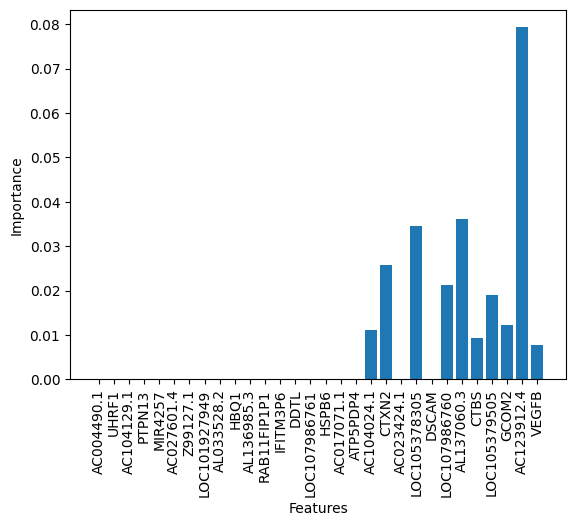

In [ ]:
check_coef = lasso_coef[20:50]
plt.bar(gene_name[20:50], check_coef)
plt.xticks(rotation = 90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [ ]:
coef_df = pd.DataFrame({'Feature': gene_name, 'Coefficient': lasso_coef})
coef_df.head()

,Feature,Coefficient
0,GNAO1-DT,0.0
1,LY6G6E,0.0
2,AC099332.2,0.0
3,AC008759.2,0.0
4,AC109466.1,0.0


In [ ]:
sorted_coef = coef_df.sort_values('Coefficient', axis = 0, ascending = False)
sorted_coef.head()

,Feature,Coefficient
1192,TLDC1,0.188233
142,SQRDL,0.143421
7932,C11orf84,0.133312
3879,GATSL3,0.118470
7601,LOC101060091,0.110458


In [ ]:
selected_df = sorted_coef[:50]
selected_df

,Feature,Coefficient
1192,TLDC1,0.188233
142,SQRDL,0.143421
7932,C11orf84,0.133312
3879,GATSL3,0.118470
7601,LOC101060091,0.110458
48,AC123912.4,0.079308
69,WDR60,0.075007
13701,C1orf106,0.061726
309,SUV420H1,0.058218
13923,C5orf28,0.057669


In [ ]:
len(selected_df.index)

50

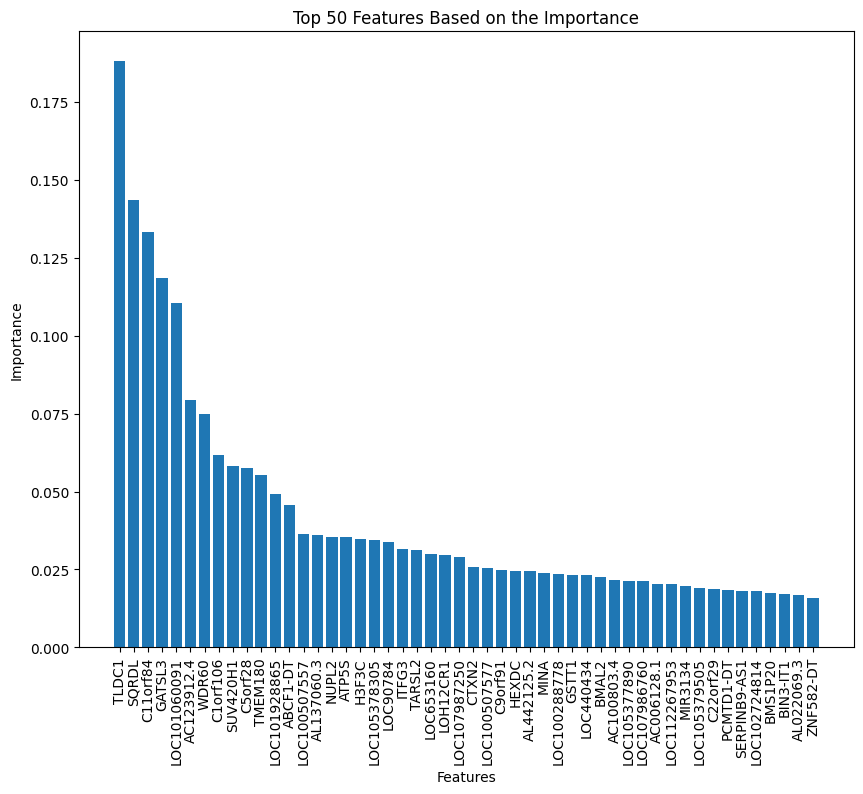

In [ ]:
plt.figure(figsize = (10, 8))
plt.bar(selected_df['Feature'], selected_df['Coefficient'])
plt.xticks(rotation = 90)
plt.title("Top 50 Features Based on the Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [ ]:
selected_df.set_index('Feature', inplace = True)
selected_df.head()

,Coefficient
Feature,
TLDC1,0.188233
SQRDL,0.143421
C11orf84,0.133312
GATSL3,0.118470
LOC101060091,0.110458


In [ ]:
selected_features = list(selected_df.index.values)
print(selected_features)

['TLDC1', 'SQRDL', 'C11orf84', 'GATSL3', 'LOC101060091', 'AC123912.4', 'WDR60', 'C1orf106', 'SUV420H1', 'C5orf28', 'TMEM180', 'LOC101928865', 'ABCF1-DT', 'LOC100507557', 'AL137060.3', 'NUPL2', 'ATP5S', 'H3F3C', 'LOC105378305', 'LOC90784', 'ITFG3', 'TARSL2', 'LOC653160', 'LOH12CR1', 'LOC107987250', 'CTXN2', 'LOC100507577', 'C9orf91', 'HEXDC', 'AL442125.2', 'MINA', 'LOC100288778', 'GSTT1', 'LOC440434', 'BMAL2', 'AC100803.4', 'LOC105377890', 'LOC107986760', 'AC006128.1', 'LOC112267953', 'MIR3134', 'LOC105379505', 'C22orf29', 'PCMTD1-DT', 'SERPINB9-AS1', 'LOC102724814', 'BMS1P20', 'BIN3-IT1', 'AL022069.3', 'ZNF582-DT']


In [ ]:
# with open('/content/drive/MyDrive/Tugas Akhir/Features_selection_revisi/lasso_0001_50/features_50_lasso_selected.txt', 'w') as f:
 # for gene in selected_features:
  #  f.write(f"{gene}\n")

### Random Forest

In [ ]:
gene_name = list(x.columns.values)
print(gene_name)

['GNAO1-DT', 'LY6G6E', 'AC099332.2', 'AC008759.2', 'AC109466.1', 'AC011815.1', 'LOC105369904', 'LOC105376278', 'CLEC2L', 'AC010768.1', 'LOC107984377', 'AC006557.1', 'AC241585.2', 'PKP2', 'ARHGEF17-AS1', 'TSTD1', 'AL157384.1', 'AC112721.2', 'PCDHB14', 'SNORD38C', 'AC004490.1', 'UHRF1', 'AC104129.1', 'PTPN13', 'MIR4257', 'AC027601.4', 'Z99127.1', 'LOC101927949', 'AL033528.2', 'HBQ1', 'AL136985.3', 'RAB11FIP1P1', 'IFITM3P6', 'DDTL', 'LOC107986761', 'HSPB6', 'AC017071.1', 'ATP5PDP4', 'AC104024.1', 'CTXN2', 'AC023424.1', 'LOC105378305', 'DSCAM', 'LOC107986760', 'AL137060.3', 'CTBS', 'LOC105379505', 'GCOM2', 'AC123912.4', 'VEGFB', 'AC100803.4', 'ABCF1-DT', 'AL442125.2', 'ABHD17AP3', 'AC091138.1', 'AC092042.1', 'AC139491.5', 'AC073343.2', 'AL121950.1', 'RPS15AP36', 'ANKRD34B', 'AC006483.2', 'LOC107987250', 'IGFLR1', 'AC007637.1', 'AC006128.1', 'AC132008.2', 'AC115099.1', 'GAPDHP69', 'WDR60', 'AC114878.1', 'AP002026.1', 'AC005253.1', 'RNU1-91P', 'KDELC2', 'TRAV1-2', 'AC008026.1', 'AL031714.1',

In [ ]:
len(gene_name)

16176

In [ ]:
rf = RandomForestClassifier(
    criterion = 'gini',
    max_depth = 30,
    max_features = 'sqrt',
    min_samples_leaf = 2,
    min_samples_split = 8,
    n_estimators = 50,
    random_state = 42
)

In [ ]:
rf.fit(x, label_1d)

RandomForestClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=8,
                       n_estimators=50, random_state=42)

In [ ]:
importances = rf.feature_importances_
importances

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
importance_df = pd.DataFrame({'Feature': gene_name, 'Importance': importances})
importance_df.head()

,Feature,Importance
0,GNAO1-DT,0.0
1,LY6G6E,0.0
2,AC099332.2,0.0
3,AC008759.2,0.0
4,AC109466.1,0.0


In [ ]:
sort_importance = importance_df.sort_values('Importance', axis = 0, ascending = False)
sort_importance.head()

,Feature,Importance
5834,AL162430.2,0.018407
10645,MUT,0.009535
15886,NPM1P51,0.009510
5073,AC007298.2,0.009477
10479,AC008957.2,0.009468


In [ ]:
selected_df = sort_importance[:50]
selected_df.head()

,Feature,Importance
5834,AL162430.2,0.018407
10645,MUT,0.009535
15886,NPM1P51,0.009510
5073,AC007298.2,0.009477
10479,AC008957.2,0.009468


In [ ]:
len(selected_df.index)

50

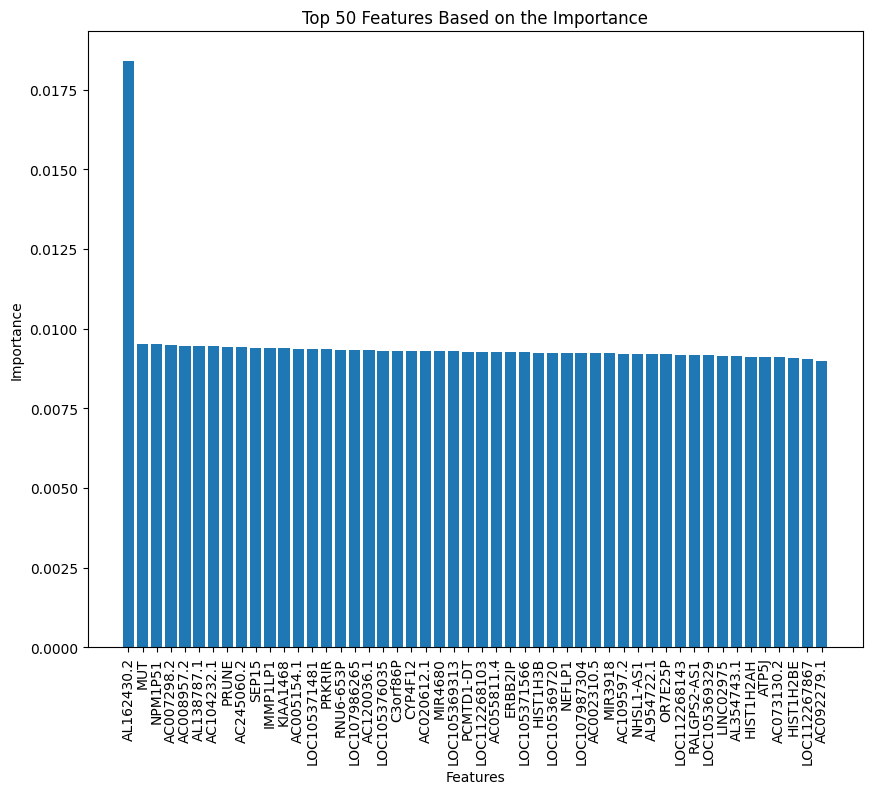

In [ ]:
plt.figure(figsize = (10, 8))
plt.bar(selected_df['Feature'], selected_df['Importance'])
plt.xticks(rotation = 90)
plt.title("Top 50 Features Based on the Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [ ]:
selected_df.set_index('Feature', inplace = True)
selected_df.head()

,Importance
Feature,
AL162430.2,0.018407
MUT,0.009535
NPM1P51,0.009510
AC007298.2,0.009477
AC008957.2,0.009468


In [ ]:
selected_features = list(selected_df.index.values)
print(selected_features)

['AL162430.2', 'MUT', 'NPM1P51', 'AC007298.2', 'AC008957.2', 'AL138787.1', 'AC104232.1', 'PRUNE', 'AC245060.2', 'SEP15', 'IMMP1LP1', 'KIAA1468', 'AC005154.1', 'LOC105371481', 'PRKRIR', 'RNU6-653P', 'LOC107986265', 'AC120036.1', 'LOC105376035', 'C3orf86P', 'CYP4F12', 'AC020612.1', 'MIR4680', 'LOC105369313', 'PCMTD1-DT', 'LOC112268103', 'AC055811.4', 'ERBB2IP', 'LOC105371566', 'HIST1H3B', 'LOC105369720', 'NEFLP1', 'LOC107987304', 'AC002310.5', 'MIR3918', 'AC109597.2', 'NHSL1-AS1', 'AL954722.1', 'OR7E25P', 'LOC112268143', 'RALGPS2-AS1', 'LOC105369329', 'LINC02975', 'AL354743.1', 'HIST1H2AH', 'ATP5J', 'AC073130.2', 'HIST1H2BE', 'LOC112267867', 'AC092279.1']


In [ ]:
len(selected_features)

50

In [ ]:
# with open('/content/drive/MyDrive/Tugas Akhir/Features_selection_revisi/random_forest_50/features_50_rf_selected.txt', 'w') as f:
 # for gene in selected_features:
  #  f.write(f"{gene}\n")

### Transform Dataset

#### Training Data

In [ ]:
with open('/content/drive/MyDrive/Tugas Akhir/Features_selection_revisi/random_forest_50/features_50_rf_selected.txt', 'r') as file:
    selected_genes = [line.strip() for line in file]

print(selected_genes)

['AL162430.2', 'MUT', 'NPM1P51', 'AC007298.2', 'AC008957.2', 'AL138787.1', 'AC104232.1', 'PRUNE', 'AC245060.2', 'SEP15', 'IMMP1LP1', 'KIAA1468', 'AC005154.1', 'LOC105371481', 'PRKRIR', 'RNU6-653P', 'LOC107986265', 'AC120036.1', 'LOC105376035', 'C3orf86P', 'CYP4F12', 'AC020612.1', 'MIR4680', 'LOC105369313', 'PCMTD1-DT', 'LOC112268103', 'AC055811.4', 'ERBB2IP', 'LOC105371566', 'HIST1H3B', 'LOC105369720', 'NEFLP1', 'LOC107987304', 'AC002310.5', 'MIR3918', 'AC109597.2', 'NHSL1-AS1', 'AL954722.1', 'OR7E25P', 'LOC112268143', 'RALGPS2-AS1', 'LOC105369329', 'LINC02975', 'AL354743.1', 'HIST1H2AH', 'ATP5J', 'AC073130.2', 'HIST1H2BE', 'LOC112267867', 'AC092279.1']


In [ ]:
len(selected_genes)

50

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Tugas Akhir/DEG_revisi_train/train_DEG_data_revisi.tsv", sep = "\t")
df1.head()

,Unnamed: 0,GSM7461809,MP2PRT_ALL_482,GSE277354_67,MP2PRT_ALL_1066,MP2PRT_ALL_613,GSM3028297,GSE277354_65,MP2PRT_ALL_1005,TCGA_LAML_61,...,GSM4280632,MP2PRT_ALL_70,GSM7221895,GSM4280636,GSM7968096,MP2PRT_ALL_232,GSM8013463,MP2PRT_ALL_989,MP2PRT_ALL_339,MP2PRT_ALL_779
0,GNAO1-DT,-27.645051,-66.175957,66.020062,-66.175957,-66.175957,-41.516867,66.020062,-66.175957,93.123603,...,88.713216,-66.175957,65.720168,88.430187,50.726246,-66.175957,224.693146,-66.175957,-66.175957,-66.175957
1,LY6G6E,34.317386,272.063154,-58.012831,115.925247,115.925247,-79.684082,-60.108516,115.925247,-249.742190,...,-150.257755,206.169617,-182.762389,-151.689546,-159.978083,115.925247,-267.541690,184.989213,115.925247,217.305345
2,AC099332.2,-71.788375,117.215324,-95.654754,66.326093,75.886206,-71.788127,-95.654754,33.545784,-79.944698,...,-152.274411,152.777274,-102.114086,-152.274411,-93.029120,67.086740,-122.945124,85.070198,57.984477,51.453954
3,AC008759.2,-88.828399,88.350180,-112.768255,105.326585,323.636357,-88.827930,-112.768255,306.842121,-167.204464,...,-169.120187,48.217425,-118.796390,-169.120187,-110.117630,95.259486,-139.716973,48.217425,80.612156,48.217425
4,AC109466.1,-81.733396,60.041676,-105.362715,42.859985,120.681207,-81.732795,-105.362715,49.548074,-56.991109,...,-142.293650,44.332290,-76.148370,-142.293650,-38.819024,62.469876,-69.761579,101.989747,46.863791,54.101427


In [ ]:
df1 = df1.set_index('Unnamed: 0')
df1.head()

,GSM7461809,MP2PRT_ALL_482,GSE277354_67,MP2PRT_ALL_1066,MP2PRT_ALL_613,GSM3028297,GSE277354_65,MP2PRT_ALL_1005,TCGA_LAML_61,MP2PRT_ALL_1131,...,GSM4280632,MP2PRT_ALL_70,GSM7221895,GSM4280636,GSM7968096,MP2PRT_ALL_232,GSM8013463,MP2PRT_ALL_989,MP2PRT_ALL_339,MP2PRT_ALL_779
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
GNAO1-DT,-27.645051,-66.175957,66.020062,-66.175957,-66.175957,-41.516867,66.020062,-66.175957,93.123603,-66.175957,...,88.713216,-66.175957,65.720168,88.430187,50.726246,-66.175957,224.693146,-66.175957,-66.175957,-66.175957
LY6G6E,34.317386,272.063154,-58.012831,115.925247,115.925247,-79.684082,-60.108516,115.925247,-249.742190,186.097826,...,-150.257755,206.169617,-182.762389,-151.689546,-159.978083,115.925247,-267.541690,184.989213,115.925247,217.305345
AC099332.2,-71.788375,117.215324,-95.654754,66.326093,75.886206,-71.788127,-95.654754,33.545784,-79.944698,159.388659,...,-152.274411,152.777274,-102.114086,-152.274411,-93.029120,67.086740,-122.945124,85.070198,57.984477,51.453954
AC008759.2,-88.828399,88.350180,-112.768255,105.326585,323.636357,-88.827930,-112.768255,306.842121,-167.204464,48.217425,...,-169.120187,48.217425,-118.796390,-169.120187,-110.117630,95.259486,-139.716973,48.217425,80.612156,48.217425
AC109466.1,-81.733396,60.041676,-105.362715,42.859985,120.681207,-81.732795,-105.362715,49.548074,-56.991109,54.242609,...,-142.293650,44.332290,-76.148370,-142.293650,-38.819024,62.469876,-69.761579,101.989747,46.863791,54.101427


In [ ]:
train_selected = df1.loc[selected_genes]
train_selected.head()

,GSM7461809,MP2PRT_ALL_482,GSE277354_67,MP2PRT_ALL_1066,MP2PRT_ALL_613,GSM3028297,GSE277354_65,MP2PRT_ALL_1005,TCGA_LAML_61,MP2PRT_ALL_1131,...,GSM4280632,MP2PRT_ALL_70,GSM7221895,GSM4280636,GSM7968096,MP2PRT_ALL_232,GSM8013463,MP2PRT_ALL_989,MP2PRT_ALL_339,MP2PRT_ALL_779
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
AL162430.2,-94.473225,100.750699,-180.166432,138.407936,204.848373,-94.472493,-180.166432,195.921968,-101.377697,178.475382,...,-166.081332,150.148382,-135.230896,-166.081332,-50.268333,84.094981,-153.597859,176.404131,168.764804,121.328765
MUT,-58.736442,77.132727,-105.513025,77.132727,77.132727,-58.736272,-165.595015,77.132727,-59.784933,77.132727,...,-144.810431,77.132727,-58.935366,-144.810431,-17.818392,77.132727,-59.784983,77.132727,77.132727,77.132727
NPM1P51,-61.617497,57.184488,-85.441179,44.840806,168.138724,-61.617066,-85.441179,26.867904,-67.876731,26.867904,...,-112.866737,42.750349,-55.486037,-112.866737,-18.833356,69.784812,-48.932033,45.705634,44.319664,68.250297
AC007298.2,-112.375907,80.702345,-70.172894,40.345229,40.345229,-112.374997,-70.172894,125.885187,-23.733923,90.562333,...,-36.079929,111.348385,-61.095831,-36.079929,-68.238480,116.146230,-43.127886,130.028660,134.091271,100.923727
AC008957.2,-100.675201,126.116340,-60.723663,41.245634,88.433838,-100.674578,-60.723663,41.245634,-143.013385,95.367337,...,-8.955900,96.077189,-130.230343,-8.955900,-58.038940,70.917947,-151.169591,79.142618,90.618423,116.163717


In [ ]:
print(len(train_selected.index))
print(len(train_selected.columns))

50
1852


In [ ]:
#train_selected.to_csv('/content/drive/MyDrive/Tugas Akhir/Features_selection_revisi/random_forest_50/training_selected.tsv', sep = "\t")

In [ ]:
check_train = pd.read_csv("/content/drive/MyDrive/Tugas Akhir/Features_selection_revisi/random_forest_50/training_selected.tsv", sep = "\t")
check_train.head()

,Unnamed: 0,GSM7461809,MP2PRT_ALL_482,GSE277354_67,MP2PRT_ALL_1066,MP2PRT_ALL_613,GSM3028297,GSE277354_65,MP2PRT_ALL_1005,TCGA_LAML_61,...,GSM4280632,MP2PRT_ALL_70,GSM7221895,GSM4280636,GSM7968096,MP2PRT_ALL_232,GSM8013463,MP2PRT_ALL_989,MP2PRT_ALL_339,MP2PRT_ALL_779
0,AL162430.2,-94.473225,100.750699,-180.166432,138.407936,204.848373,-94.472493,-180.166432,195.921968,-101.377697,...,-166.081332,150.148382,-135.230896,-166.081332,-50.268333,84.094981,-153.597859,176.404131,168.764804,121.328765
1,MUT,-58.736442,77.132727,-105.513025,77.132727,77.132727,-58.736272,-165.595015,77.132727,-59.784933,...,-144.810431,77.132727,-58.935366,-144.810431,-17.818392,77.132727,-59.784983,77.132727,77.132727,77.132727
2,NPM1P51,-61.617497,57.184488,-85.441179,44.840806,168.138724,-61.617066,-85.441179,26.867904,-67.876731,...,-112.866737,42.750349,-55.486037,-112.866737,-18.833356,69.784812,-48.932033,45.705634,44.319664,68.250297
3,AC007298.2,-112.375907,80.702345,-70.172894,40.345229,40.345229,-112.374997,-70.172894,125.885187,-23.733923,...,-36.079929,111.348385,-61.095831,-36.079929,-68.238480,116.146230,-43.127886,130.028660,134.091271,100.923727
4,AC008957.2,-100.675201,126.116340,-60.723663,41.245634,88.433838,-100.674578,-60.723663,41.245634,-143.013385,...,-8.955900,96.077189,-130.230343,-8.955900,-58.038940,70.917947,-151.169591,79.142618,90.618423,116.163717


In [ ]:
print(len(check_train.index))
print(len(check_train.columns))

50
1853


#### Validation Data

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/Tugas Akhir/DEG_revisi_train/valid_DEG_data_revisi.tsv", sep = "\t")
df2.head()

,Unnamed: 0,GSM1614669,MP2PRT_ALL_1024,MP2PRT_ALL_1241,MP2PRT_ALL_337,MP2PRT_ALL_161,MP2PRT_ALL_118,GSM1256824,TCGA_LAML_86,GSM7968123,...,MP2PRT_ALL_1159,GSM4280562,NBM13_CD34,MP2PRT_ALL_865,GSM4983932,MP2PRT_ALL_944,MP2PRT_ALL_1227,GSM6062693,MP2PRT_ALL_30,MP2PRT_ALL_1218
0,GNAO1-DT,69.540261,-66.175957,-66.175957,-66.175957,-66.175957,-66.175957,-54.981518,93.123603,50.726246,...,-66.175957,42.716303,-15.038534,-66.175957,27.806729,-66.175957,-66.175957,12.050217,-66.175957,-66.175957
1,LY6G6E,-89.483370,176.223791,163.160381,156.003063,243.537211,115.925247,-85.035032,-286.363209,-159.978083,...,331.493118,-63.431565,35.410624,272.789286,-92.051722,246.154361,167.912153,-41.107182,115.925247,115.925247
2,AC099332.2,-84.743189,71.262760,52.456834,78.462820,130.524089,15.758968,-71.787618,-150.848649,-93.029120,...,98.429715,-78.346199,-142.040114,97.220722,-99.571386,106.013838,88.639106,-63.774892,110.056103,140.686900
3,AC008759.2,-101.789462,137.567827,127.696992,104.057431,165.406416,143.680707,-88.826972,-135.442172,-110.117630,...,180.684161,-95.470856,-6.488321,98.749526,-116.482574,48.217425,141.707920,-80.727659,105.768779,48.217425
4,AC109466.1,-47.556687,52.990863,109.319559,107.863161,123.806059,52.414929,-81.731571,-80.563020,-38.819024,...,56.942321,-92.239552,-135.489439,54.435971,-104.283420,49.695892,36.823236,-78.304886,92.571538,130.010709


In [ ]:
df2 = df2.set_index('Unnamed: 0')
df2.head()

,GSM1614669,MP2PRT_ALL_1024,MP2PRT_ALL_1241,MP2PRT_ALL_337,MP2PRT_ALL_161,MP2PRT_ALL_118,GSM1256824,TCGA_LAML_86,GSM7968123,MP2PRT_ALL_1011,...,MP2PRT_ALL_1159,GSM4280562,NBM13_CD34,MP2PRT_ALL_865,GSM4983932,MP2PRT_ALL_944,MP2PRT_ALL_1227,GSM6062693,MP2PRT_ALL_30,MP2PRT_ALL_1218
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
GNAO1-DT,69.540261,-66.175957,-66.175957,-66.175957,-66.175957,-66.175957,-54.981518,93.123603,50.726246,-66.175957,...,-66.175957,42.716303,-15.038534,-66.175957,27.806729,-66.175957,-66.175957,12.050217,-66.175957,-66.175957
LY6G6E,-89.483370,176.223791,163.160381,156.003063,243.537211,115.925247,-85.035032,-286.363209,-159.978083,279.450593,...,331.493118,-63.431565,35.410624,272.789286,-92.051722,246.154361,167.912153,-41.107182,115.925247,115.925247
AC099332.2,-84.743189,71.262760,52.456834,78.462820,130.524089,15.758968,-71.787618,-150.848649,-93.029120,134.308474,...,98.429715,-78.346199,-142.040114,97.220722,-99.571386,106.013838,88.639106,-63.774892,110.056103,140.686900
AC008759.2,-101.789462,137.567827,127.696992,104.057431,165.406416,143.680707,-88.826972,-135.442172,-110.117630,117.121172,...,180.684161,-95.470856,-6.488321,98.749526,-116.482574,48.217425,141.707920,-80.727659,105.768779,48.217425
AC109466.1,-47.556687,52.990863,109.319559,107.863161,123.806059,52.414929,-81.731571,-80.563020,-38.819024,104.686789,...,56.942321,-92.239552,-135.489439,54.435971,-104.283420,49.695892,36.823236,-78.304886,92.571538,130.010709


In [ ]:
valid_selected = df2.loc[selected_genes]
valid_selected.head()

,GSM1614669,MP2PRT_ALL_1024,MP2PRT_ALL_1241,MP2PRT_ALL_337,MP2PRT_ALL_161,MP2PRT_ALL_118,GSM1256824,TCGA_LAML_86,GSM7968123,MP2PRT_ALL_1011,...,MP2PRT_ALL_1159,GSM4280562,NBM13_CD34,MP2PRT_ALL_865,GSM4983932,MP2PRT_ALL_944,MP2PRT_ALL_1227,GSM6062693,MP2PRT_ALL_30,MP2PRT_ALL_1218
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
AL162430.2,-59.493568,149.996396,119.991948,152.705554,161.795442,133.335211,-94.471003,-176.199390,-50.268333,198.996011,...,216.160101,-163.954124,-128.356337,146.177860,-123.740633,201.728048,185.462121,-140.400636,131.110581,168.921272
MUT,-28.404133,77.132727,77.132727,77.132727,77.132727,77.132727,-58.735923,-59.784933,-17.818392,77.132727,...,77.132727,-106.620278,-58.733312,77.132727,-94.706054,77.132727,77.132727,-81.424352,77.132727,77.132727
NPM1P51,-26.248464,68.025479,62.212857,68.738787,87.149983,43.865341,-61.616187,-73.946832,-18.833356,57.430069,...,26.867904,-74.319600,-76.689122,64.861646,-81.504289,65.193001,65.680024,-61.376623,26.867904,26.867904
AC007298.2,-78.128867,124.009384,73.913599,134.651165,40.345229,84.976016,-112.373146,-75.725519,-68.238480,109.634181,...,40.345229,-86.412675,-72.579797,40.345229,-80.698688,91.614434,40.345229,-105.810889,98.218322,283.473133
AC008957.2,-69.583016,41.245634,139.674846,84.398959,101.409121,41.245634,-100.673308,-85.828826,-58.038940,126.783006,...,41.245634,-80.346009,-58.968859,167.619308,-64.618210,80.592434,97.221934,-101.757773,41.245634,41.245634


In [ ]:
print(len(valid_selected.index))
print(len(valid_selected.columns))

50
523


In [ ]:
#valid_selected.to_csv('/content/drive/MyDrive/Tugas Akhir/Features_selection_revisi/random_forest_50/validation_selected.tsv', sep = "\t")

In [ ]:
check_valid = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/Features_selection_revisi/random_forest_50/validation_selected.tsv', sep = "\t")
check_valid.head()

,Unnamed: 0,GSM1614669,MP2PRT_ALL_1024,MP2PRT_ALL_1241,MP2PRT_ALL_337,MP2PRT_ALL_161,MP2PRT_ALL_118,GSM1256824,TCGA_LAML_86,GSM7968123,...,MP2PRT_ALL_1159,GSM4280562,NBM13_CD34,MP2PRT_ALL_865,GSM4983932,MP2PRT_ALL_944,MP2PRT_ALL_1227,GSM6062693,MP2PRT_ALL_30,MP2PRT_ALL_1218
0,AL162430.2,-59.493568,149.996396,119.991948,152.705554,161.795442,133.335211,-94.471003,-176.199390,-50.268333,...,216.160101,-163.954124,-128.356337,146.177860,-123.740633,201.728048,185.462121,-140.400636,131.110581,168.921272
1,MUT,-28.404133,77.132727,77.132727,77.132727,77.132727,77.132727,-58.735923,-59.784933,-17.818392,...,77.132727,-106.620278,-58.733312,77.132727,-94.706054,77.132727,77.132727,-81.424352,77.132727,77.132727
2,NPM1P51,-26.248464,68.025479,62.212857,68.738787,87.149983,43.865341,-61.616187,-73.946832,-18.833356,...,26.867904,-74.319600,-76.689122,64.861646,-81.504289,65.193001,65.680024,-61.376623,26.867904,26.867904
3,AC007298.2,-78.128867,124.009384,73.913599,134.651165,40.345229,84.976016,-112.373146,-75.725519,-68.238480,...,40.345229,-86.412675,-72.579797,40.345229,-80.698688,91.614434,40.345229,-105.810889,98.218322,283.473133
4,AC008957.2,-69.583016,41.245634,139.674846,84.398959,101.409121,41.245634,-100.673308,-85.828826,-58.038940,...,41.245634,-80.346009,-58.968859,167.619308,-64.618210,80.592434,97.221934,-101.757773,41.245634,41.245634


In [ ]:
print(len(check_valid.index))
print(len(check_valid.columns))

50
524


#### Testing Data

In [ ]:
df3 = pd.read_csv("/content/drive/MyDrive/Tugas Akhir/DEG_revisi_train/test_DEG_data_revisi.tsv", sep = "\t")
df3.head()

,Unnamed: 0,7653-HSC,GSM7461821,7256-Mono,GSM1554643,MP2PRT_ALL_818,TCGA_LAML_97,GSM3028278,TCGA_LAML_132,MP2PRT_ALL_1280,...,GSM3104743,GSM8013522,MP2PRT_ALL_756,NBM4_CD14,GSM7968109,GSM6340864,GSM4116460,GSM8013450,GSM1554629,GSM4280633
0,GNAO1-DT,16.867636,-27.645051,16.867636,80.220738,-66.175957,93.123603,10.171077,93.123603,-66.175957,...,40.944270,73.911763,-66.175957,-15.034007,106.866354,138.166391,20.550156,73.911763,85.155650,88.266315
1,LY6G6E,-94.491832,4.932561,-94.491832,-298.266671,194.691520,-202.534414,-79.684082,-251.786232,283.365831,...,-98.163344,-168.825069,148.113417,-90.554737,-159.978083,-59.837465,-99.885305,-66.520874,-298.266671,-152.916837
2,AC099332.2,-99.522864,-71.788375,-99.522864,-122.943434,76.516967,-97.415968,-71.788127,-68.072912,159.028974,...,-95.080760,-122.945124,50.100143,-116.613752,-93.029120,-95.650359,-98.373043,-122.945124,-122.943434,-152.274411
3,AC008759.2,-116.287739,-88.828399,-116.287739,-139.714967,237.507240,-194.012090,-88.827930,-140.800304,111.125250,...,-111.852060,-139.716973,130.234020,-30.874925,-110.117630,-112.761902,-114.603204,-139.716973,-139.714967,-169.120187
4,AC109466.1,-70.380841,-81.733396,-70.380841,-69.760671,108.701822,-74.450068,-81.732795,-77.998792,124.214004,...,-47.579069,-69.761579,56.499250,-120.476469,-38.819024,-105.355081,-71.889533,-69.761579,-69.760671,-142.293650


In [ ]:
df3 = df3.set_index('Unnamed: 0')
df3.head()

,7653-HSC,GSM7461821,7256-Mono,GSM1554643,MP2PRT_ALL_818,TCGA_LAML_97,GSM3028278,TCGA_LAML_132,MP2PRT_ALL_1280,MP2PRT_ALL_876,...,GSM3104743,GSM8013522,MP2PRT_ALL_756,NBM4_CD14,GSM7968109,GSM6340864,GSM4116460,GSM8013450,GSM1554629,GSM4280633
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
GNAO1-DT,16.867636,-27.645051,16.867636,80.220738,-66.175957,93.123603,10.171077,93.123603,-66.175957,-66.175957,...,40.944270,73.911763,-66.175957,-15.034007,106.866354,138.166391,20.550156,73.911763,85.155650,88.266315
LY6G6E,-94.491832,4.932561,-94.491832,-298.266671,194.691520,-202.534414,-79.684082,-251.786232,283.365831,225.161218,...,-98.163344,-168.825069,148.113417,-90.554737,-159.978083,-59.837465,-99.885305,-66.520874,-298.266671,-152.916837
AC099332.2,-99.522864,-71.788375,-99.522864,-122.943434,76.516967,-97.415968,-71.788127,-68.072912,159.028974,91.018022,...,-95.080760,-122.945124,50.100143,-116.613752,-93.029120,-95.650359,-98.373043,-122.945124,-122.943434,-152.274411
AC008759.2,-116.287739,-88.828399,-116.287739,-139.714967,237.507240,-194.012090,-88.827930,-140.800304,111.125250,127.279832,...,-111.852060,-139.716973,130.234020,-30.874925,-110.117630,-112.761902,-114.603204,-139.716973,-139.714967,-169.120187
AC109466.1,-70.380841,-81.733396,-70.380841,-69.760671,108.701822,-74.450068,-81.732795,-77.998792,124.214004,68.600144,...,-47.579069,-69.761579,56.499250,-120.476469,-38.819024,-105.355081,-71.889533,-69.761579,-69.760671,-142.293650


In [ ]:
test_selected = df3.loc[selected_genes]
test_selected.head()

,7653-HSC,GSM7461821,7256-Mono,GSM1554643,MP2PRT_ALL_818,TCGA_LAML_97,GSM3028278,TCGA_LAML_132,MP2PRT_ALL_1280,MP2PRT_ALL_876,...,GSM3104743,GSM8013522,MP2PRT_ALL_756,NBM4_CD14,GSM7968109,GSM6340864,GSM4116460,GSM8013450,GSM1554629,GSM4280633
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
AL162430.2,-115.561324,-94.473225,-115.561324,-153.595422,158.084956,-111.754465,-94.472493,-153.707181,163.735089,101.074112,...,-58.336352,-153.597859,161.611990,-136.087707,-50.268333,-180.150687,-115.524706,-153.597859,-153.595422,-166.081332
MUT,-56.805734,-58.736442,-59.119095,-59.784386,77.132727,-59.784933,-58.736272,-59.784933,77.132727,77.132727,...,-21.190636,-59.784983,77.132727,-58.734743,-17.818392,-125.350383,-58.892695,-59.784983,-59.784386,-144.810431
NPM1P51,-50.585805,-61.617497,-50.585805,-48.931433,26.867904,-22.821749,-61.617066,-70.232574,83.371166,96.597290,...,-32.023758,-48.932033,44.095727,-74.251448,-18.833356,-85.434960,-51.928444,-48.932033,-48.931433,-112.866737
AC007298.2,-87.346887,-112.375907,-87.346887,-43.127548,142.149680,-33.465142,-112.374997,-73.031521,103.604739,119.849633,...,-73.985106,-43.127886,153.334540,-59.299653,-68.238480,-70.169999,-81.382458,-43.127886,-43.127548,-36.079929
AC008957.2,-127.904080,-100.675201,-127.904080,-151.167370,41.245634,-61.411737,-100.674578,-140.984306,41.245634,108.490660,...,-59.319726,-151.169591,117.118330,-106.889884,-58.038940,-60.723135,-125.817117,-151.169591,-151.167370,-8.955900


In [ ]:
print(len(test_selected.index))
print(len(test_selected.columns))

50
263


In [ ]:
#test_selected.to_csv('/content/drive/MyDrive/Tugas Akhir/Features_selection_revisi/random_forest_50/testing_selected.tsv', sep = "\t")

In [ ]:
check_test = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/Features_selection_revisi/random_forest_50/testing_selected.tsv', sep = "\t")
check_test.head()

,Unnamed: 0,7653-HSC,GSM7461821,7256-Mono,GSM1554643,MP2PRT_ALL_818,TCGA_LAML_97,GSM3028278,TCGA_LAML_132,MP2PRT_ALL_1280,...,GSM3104743,GSM8013522,MP2PRT_ALL_756,NBM4_CD14,GSM7968109,GSM6340864,GSM4116460,GSM8013450,GSM1554629,GSM4280633
0,AL162430.2,-115.561324,-94.473225,-115.561324,-153.595422,158.084956,-111.754465,-94.472493,-153.707181,163.735089,...,-58.336352,-153.597859,161.611990,-136.087707,-50.268333,-180.150687,-115.524706,-153.597859,-153.595422,-166.081332
1,MUT,-56.805734,-58.736442,-59.119095,-59.784386,77.132727,-59.784933,-58.736272,-59.784933,77.132727,...,-21.190636,-59.784983,77.132727,-58.734743,-17.818392,-125.350383,-58.892695,-59.784983,-59.784386,-144.810431
2,NPM1P51,-50.585805,-61.617497,-50.585805,-48.931433,26.867904,-22.821749,-61.617066,-70.232574,83.371166,...,-32.023758,-48.932033,44.095727,-74.251448,-18.833356,-85.434960,-51.928444,-48.932033,-48.931433,-112.866737
3,AC007298.2,-87.346887,-112.375907,-87.346887,-43.127548,142.149680,-33.465142,-112.374997,-73.031521,103.604739,...,-73.985106,-43.127886,153.334540,-59.299653,-68.238480,-70.169999,-81.382458,-43.127886,-43.127548,-36.079929
4,AC008957.2,-127.904080,-100.675201,-127.904080,-151.167370,41.245634,-61.411737,-100.674578,-140.984306,41.245634,...,-59.319726,-151.169591,117.118330,-106.889884,-58.038940,-60.723135,-125.817117,-151.169591,-151.167370,-8.955900


In [ ]:
print(len(check_test.index))
print(len(check_test.columns))

50
264
